<img src="logoucm.png" style="height: 100px">
<center style="color:#888">Big Data<br/></center>


<h1><center>Calidad del aire en la Comunidad de Madrid</center></h1>

# Introducción

Los datos empleados en este trabajo son datos recogidos de forma diaria desde 2010 hasta 2023 por la Comunidad de Madrid sobre la concentración de diferentes contaminantes en 24 estaciones repartidas por todo su territorio. Estos datos son publicado diariamente en su página web <a href="https://airedemadrid.madrid.es/portal/site/calidadaire">Portal de Calidad del aire</a>, así como un **Índice de Calidad del Aire** que tiene como objetivo dar una valoración de los efectos de la contaminación atmosférica sobre la salud.

Se puede obtener más información de las variables recogidas en el <a href="http://localhost:8888/tree/OneDrive/Escritorio/CALIDAD%20AIRE%20MADRID">Interprete fichero</a>.
Se presenta una breve descripción de los datos recogidos.


| Atributo | Descripción |
| :- |:- |
|**PROVINCIA**| Identificador de la provincia (en este caso siempre '28'-Madrid)|
|**MUNICIPIO**| Identificador del municipio (en este caso siempre '79'-Mardrid|
|**ESTACION**| Identificador de la estación de recogida de los contaminantes|
|**MAGNITUD**| Identificador del contaminante|
|**PUNTO MUESTREO**| Identificador del punto de muestro|
|**ANO**| Año de recogida del dato|
|**MES**| Mes de recogida el dato|
|**D01**| D0_X_ indica el día del mes|
|**V01**| V0_X_ indica si el dato está verificado o no (Sí: "V", NO: "N")|

# Librerías

In [1]:
# Librerias 
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt  

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Análisis Exploratorio de los Datos

## 1.1 Limpieza de la base de datos

En primer lugar, abrimos el fichero con los datos y estudiamos la dimensión y estructura de los mismos. 

In [2]:
# Cargamos los datos
df = pd.read_csv("datos_total.csv", delimiter = ",")
df.head(5)

,Unnamed: 0,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,D01,V01,...,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
0,0,28,79,4,1,28079004_1_38,2010,1,12.0,V,...,16.0,V,21.0,V,22.0,V,17.0,V,15.0,V
1,1,28,79,4,1,28079004_1_38,2010,2,18.0,V,...,15.0,V,13.0,V,0.0,N,0.0,N,0.0,N
2,2,28,79,4,1,28079004_1_38,2010,3,13.0,V,...,14.0,V,16.0,V,15.0,V,13.0,V,14.0,V
3,3,28,79,4,1,28079004_1_38,2010,4,14.0,V,...,9.0,V,9.0,V,9.0,V,9.0,V,0.0,N
4,4,28,79,4,1,28079004_1_38,2010,5,8.0,V,...,9.0,V,9.0,V,9.0,V,9.0,V,9.0,V


In [3]:
# Numero de obeservaciones y de variables
df.shape

(21633, 70)

Tenemos 21633 registros de 70 variables, aunque eliminamos las variables ***provoncia*** y ***municipio*** por ser redundantes. 

In [4]:
# Variables
df = df.drop(columns=['Unnamed: 0', 'PROVINCIA', 'MUNICIPIO'], axis = 1)

En primer lugar, vamos a tratar con el problema de los datos no verificados. Sólo son validos aquellos datos acompañados de un código de verificación *V*.

El estudio que vamos a realizar crea un índice a partir de ciertos compuestos (<a href="https://airedemadrid.madrid.es/portales/calidadaire/es/Bases-de-datos-y-publicaciones/Bases-de-datos-de-calidad-del-aire/Indices-y-zonas/Indice-de-calidad-del-aire/?vgnextfmt=default&vgnextoid=303d635a41187710VgnVCM1000001d4a900aRCRD&vgnextchannel=480285a1259d7710VgnVCM2000001f4a900aRCRD">Índice de Calidad del Aire</a>). Por ello, vamos a seleccionar las magnitudes que nos interesan reduciendo así la dimensionalidad del problema.

*Los compuestos que se emplean para calcular el índice de calidad son las partículas en suspensión (PM10 y PM2,5), dióxido de azufre, dióxido de nitrógeno y ozono. Para cada uno de estos contaminantes se establece un índice parcial, de forma que el peor valor de los cinco definirá el índice global y, por lo tanto, la calidad del aire en el municipio de Madrid.*

| Contaminantes | id| Muy bueno | Bueno | Regular | Malo | Muy malo |
| :- |:- |:-|:-|:-|:-| :-|
|Partículas PM2,5| 9| 0-15|16-30|31-55|56-110|>110|
|Partículas PM10| 10| 0-25|26-50|51-90|91-180|>180|
|NO2| 8| 0-50|51-100|101-200|201-400|>400|
|O3| 14|0-60|61-120|121-180|181-240|>240|
|SO2| 1|0-50|51-100|101-350|351-500|>500|

Por tanto, nos quedamos con los registros de los contaminantes que conforman el índice previamente definido.

In [5]:
# DataFrame con los contaminantes de interes
df_contaminantes = df[(df['MAGNITUD'] == 9) | (df['MAGNITUD'] == 10) | 
                      (df['MAGNITUD'] == 8) | (df['MAGNITUD'] == 14) |
                      (df['MAGNITUD'] == 1)]
df_contaminantes.head(5)

,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,D01,V01,D02,V02,D03,...,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
0,4,1,28079004_1_38,2010,1,12.0,V,15.0,V,17.0,...,16.0,V,21.0,V,22.0,V,17.0,V,15.0,V
1,4,1,28079004_1_38,2010,2,18.0,V,20.0,V,24.0,...,15.0,V,13.0,V,0.0,N,0.0,N,0.0,N
2,4,1,28079004_1_38,2010,3,13.0,V,15.0,V,13.0,...,14.0,V,16.0,V,15.0,V,13.0,V,14.0,V
3,4,1,28079004_1_38,2010,4,14.0,V,14.0,V,13.0,...,9.0,V,9.0,V,9.0,V,9.0,V,0.0,N
4,4,1,28079004_1_38,2010,5,8.0,V,8.0,V,8.0,...,9.0,V,9.0,V,9.0,V,9.0,V,9.0,V


In [6]:
dias = ['D01','D02','D03','D04','D05','D06','D07','D08','D09','D10',
       'D11','D12','D13','D14','D15','D16','D17','D18','D19','D20',
       'D21','D22','D23','D24','D25','D26','D27','D28','D29','D30','D31']

verf = ['V01','V02','V03','V04','V05','V06','V07','V08','V09','V10',
       'V11','V12','V13','V14','V15','V16','V17','V18','V19','V20',
       'V21','V22','V23','V24','V25','V26','V27','V28','V29','V30','V31']

In [7]:
# Dias 
df_dias = df_contaminantes.melt(id_vars=['ESTACION', 'MAGNITUD', 'PUNTO_MUESTREO', 'ANO', 'MES'],
                                value_vars = dias,
                                var_name = 'DIA',
                                value_name = 'VALOR')
# Verificaciones
df_verf= df_contaminantes.melt(id_vars=['ESTACION', 'MAGNITUD', 'PUNTO_MUESTREO', 'ANO', 'MES'],
                               value_vars = verf,
                               var_name = 'VER',
                               value_name = 'VV')

df_dias['VV'] = df_verf['VV']
df1 = df_dias

Con este dataframe, vamos a diferencias entre los valores no verificados (aquellos que van seguidos de un 'N') y los valores no medidos por no existir el día en concreto (p.e, 30-02).

En primer lugar, eliminamos del dataframe aquellos días que no existen. 

In [8]:
date_str = df1['ANO'].astype(str) + '-' + df1['MES'].astype(str) + '-' + df1['DIA'].str.replace('D', '').astype(str)
df1['date'] = pd.to_datetime(date_str, format='%Y-%m-%d', errors='coerce')
df1 = df1.dropna(subset=['date'])
df1 = df1.sort_values(['ESTACION','MAGNITUD','date'])

In [9]:
df1

,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,VALOR,VV,date
0,4,1,28079004_1_38,2010,1,D01,12.0,V,2010-01-01
9486,4,1,28079004_1_38,2010,1,D02,15.0,V,2010-01-02
18972,4,1,28079004_1_38,2010,1,D03,17.0,V,2010-01-03
28458,4,1,28079004_1_38,2010,1,D04,16.0,V,2010-01-04
37944,4,1,28079004_1_38,2010,1,D05,16.0,V,2010-01-05
...,...,...,...,...,...,...,...,...,...
256121,60,14,28079060_14_6,2021,12,D27,52.0,V,2021-12-27
265607,60,14,28079060_14_6,2021,12,D28,42.0,V,2021-12-28
275093,60,14,28079060_14_6,2021,12,D29,19.0,V,2021-12-29
284579,60,14,28079060_14_6,2021,12,D30,9.0,V,2021-12-30


En segundo lugar, vamos a poner a valor NaN los datos no verificados para posteriormente realizar una imputación de esos valores.

In [10]:
df1.loc[df1['VV'] != 'V', 'VALOR'] = np.nan

In [11]:
# Comprobamos los valores nulos
df1.isnull().sum()

ESTACION             0
MAGNITUD             0
PUNTO_MUESTREO       0
ANO                  0
MES                  0
DIA                  0
VALOR             3920
VV                   0
date                 0
dtype: int64

In [12]:
# Comprobamos filas duplicadas
df1.duplicated().sum()

0

## 1.2 Imputación de missing

Podemos imputar missing de dos formas diferentes:

1. Interpolación 
2. KNN

**Nota:** Explicar interpolación

**Interpolación**

In [13]:
df1['VALOR'].interpolate(inplace=True)
df1 = df1.drop(['VV'],axis=1)

## 1.3 Estadísticos descriptivos

Creamos dataframe con las magnitudes

In [14]:
# Creamos el DataFrame con el que haremos las series temporales de los contaminantes
df_magnitudes = df1.pivot_table(index=['ESTACION', 'ANO', 'MES', 'DIA', 'date'], columns='MAGNITUD', values='VALOR')
df_magnitudes = df_magnitudes.reset_index()
df_magnitudes.columns = ['ESTACION','ANO','MES','DIA','date','SO2', 'NO2', 'PM2.5', 'PM10','O3']
df_magnitudes

,ESTACION,ANO,MES,DIA,date,SO2,NO2,PM2.5,PM10,O3
0,4,2010,1,D01,2010-01-01,12.0,12.0,NaN,NaN,NaN
1,4,2010,1,D02,2010-01-02,15.0,40.0,NaN,NaN,NaN
2,4,2010,1,D03,2010-01-03,17.0,51.0,NaN,NaN,NaN
3,4,2010,1,D04,2010-01-04,16.0,53.0,NaN,NaN,NaN
4,4,2010,1,D05,2010-01-05,16.0,46.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
104883,60,2021,12,D27,2021-12-27,NaN,13.0,NaN,6.0,52.0
104884,60,2021,12,D28,2021-12-28,NaN,19.0,NaN,5.0,42.0
104885,60,2021,12,D29,2021-12-29,NaN,36.0,NaN,9.0,19.0
104886,60,2021,12,D30,2021-12-30,NaN,44.0,NaN,8.0,9.0


**Nota:** Para poder ajustar una serie temporal, agrupamos por estación y damos a cada contaminante en cada día la media del valor que se haya recogido en las diferentes estaciones.

In [15]:
ts_magnitudes = df_magnitudes.groupby('date').mean()
ts_magnitudes.head(5)

,ESTACION,ANO,MES,SO2,NO2,PM2.5,PM10,O3
date,,,,,,,,
2010-01-01,36.727273,2010.0,1.0,7.9,20.521212,7.00,17.248571,53.929825
2010-01-02,36.727273,2010.0,1.0,9.5,39.996970,10.00,21.097143,25.645363
2010-01-03,36.727273,2010.0,1.0,11.6,50.518182,12.25,22.045714,12.789474
2010-01-04,36.727273,2010.0,1.0,11.6,52.221212,9.00,16.394286,13.505013
2010-01-05,36.727273,2010.0,1.0,11.9,46.469697,8.00,18.142857,21.863409


## 1.4 Outliers

# 2. Índice de Calidad del Aire

En primer lugar, vamos a crear un índice de calidad del aire. Así, para cada magnitud determinamos el indice de la forma descrita al principio.

| Contaminantes | id| Muy bueno | Bueno | Regular | Malo | Muy malo |
| :- |:- |:-|:-|:-|:-| :-|
|Partículas PM2,5| 9| 0-15|16-30|31-55|56-110|>110|
|Partículas PM10| 10| 0-25|26-50|51-90|91-180|>180|
|NO2| 8| 0-50|51-100|101-200|201-400|>400|
|O3| 14|0-60|61-120|121-180|181-240|>240|
|SO2| 1|0-50|51-100|101-350|351-500|>500|

In [16]:
# Indice para S02
# Definimos los rangos
bins = [0,50,100,350,500,float("inf")]
labels = [1,2,3,4,5]
# Creamos una columna con el indice
ts_magnitudes["I1"] = pd.cut(ts_magnitudes["SO2"], bins=bins, labels=labels)

# Indice para N02
bins = [0,50,100,200,400,float("inf")]
ts_magnitudes["I2"] = pd.cut(ts_magnitudes["NO2"], bins=bins, labels=labels)

# Indice para PM2.5
bins = [0,15,30,55,110,float("inf")]
ts_magnitudes["I3"] = pd.cut(ts_magnitudes["PM2.5"], bins=bins, labels=labels)

# Indice para PM10
bins = [0,25,50,90,180,float("inf")]
ts_magnitudes["I4"] = pd.cut(ts_magnitudes["PM10"], bins=bins, labels=labels)

# Indice para O3
bins = [0,60,120,180,240,float("inf")]
ts_magnitudes["I5"] = pd.cut(ts_magnitudes["O3"], bins=bins, labels=labels)

Así, obtenemos el siguiente DataFrame con las columnas de los índices de cada contaminante

In [17]:
ts_magnitudes.head(10)

,ESTACION,ANO,MES,SO2,NO2,PM2.5,PM10,O3,I1,I2,I3,I4,I5
date,,,,,,,,,,,,,
2010-01-01,36.727273,2010.0,1.0,7.9,20.521212,7.00,17.248571,53.929825,1,1,1,1,1
2010-01-02,36.727273,2010.0,1.0,9.5,39.996970,10.00,21.097143,25.645363,1,1,1,1,1
2010-01-03,36.727273,2010.0,1.0,11.6,50.518182,12.25,22.045714,12.789474,1,2,1,1,1
2010-01-04,36.727273,2010.0,1.0,11.6,52.221212,9.00,16.394286,13.505013,1,2,1,1,1
2010-01-05,36.727273,2010.0,1.0,11.9,46.469697,8.00,18.142857,21.863409,1,1,1,1,1
2010-01-06,36.727273,2010.0,1.0,9.7,33.081818,7.25,17.091429,34.507519,1,1,1,1,1
2010-01-07,36.727273,2010.0,1.0,9.2,33.784848,6.50,13.640000,34.508772,1,1,1,1,1
2010-01-08,36.727273,2010.0,1.0,9.5,29.760606,7.25,18.488571,52.081454,1,1,1,1,1
2010-01-09,36.727273,2010.0,1.0,9.2,32.463636,7.25,15.737143,44.011278,1,1,1,1,1


Para crear un índice general, realizamos un PCA en las variables que indican índice.

**Nota:** Explicar teoría breve de PCA y Kernel PCA

**PCA**

In [18]:
# Librerias
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [19]:
# Indices a los que vamos a aplicar el PCA
indices = ['I1','I2','I3','I4','I5']
# Creamos el objeto
pca = PCA()

# Hiperpametro para el numero de componentes 
parametros = {'n_components': list(range(1, 6))}

# Definimos la búsqueda + CV
cv = GridSearchCV(pca, parametros, cv=5, n_jobs=-1)
cv.fit(ts_magnitudes[indices])

# Resultados
print("Mejor número de componentes: ", cv.best_params_['n_components'])
print("Varianza explicada por cada componente: ", cv.best_estimator_.explained_variance_ratio_)

Mejor número de componentes:  3
Varianza explicada por cada componente:  [0.47668767 0.31678396 0.131101  ]


Como la varianza explicada total con las 2 primeras componentes es e casi un $80\%$, decidimos quedarnos con 2 componentes.

Graficamos el PCA con 2 componentes

In [20]:
# PCA con 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(ts_magnitudes[indices])

# Grafico de la trasnformacion del pca a 2 variables


Creamos el indice de calidad del aire (ica). Para ello, utilizamos la matriz de cargas (*loadings matrix*) que nos da los pesos de los coeficientes de las variables originales en la combinación lineal dada por las componentes principales. Estos pesos representan la contribuciñon de cada variable a la formación de la componente principal.

In [21]:
# Martiz de carga
cargas_factoriales = pca.components_

# Creamos el indice calidad del aire
ICA = np.dot(ts_magnitudes[indices],cargas_factoriales.T)
ICA = ICA.mean(axis=1)

ts_magnitudes['ICA'] = ICA
ts_magnitudes

,ESTACION,ANO,MES,SO2,NO2,PM2.5,PM10,O3,I1,I2,I3,I4,I5,ICA
date,,,,,,,,,,,,,,
2010-01-01,36.727273,2010.0,1.0,7.90,20.521212,7.000,17.248571,53.929825,1,1,1,1,1,1.253594
2010-01-02,36.727273,2010.0,1.0,9.50,39.996970,10.000,21.097143,25.645363,1,1,1,1,1,1.253594
2010-01-03,36.727273,2010.0,1.0,11.60,50.518182,12.250,22.045714,12.789474,1,2,1,1,1,1.338135
2010-01-04,36.727273,2010.0,1.0,11.60,52.221212,9.000,16.394286,13.505013,1,2,1,1,1,1.338135
2010-01-05,36.727273,2010.0,1.0,11.90,46.469697,8.000,18.142857,21.863409,1,1,1,1,1,1.253594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,39.217391,2021.0,12.0,3.25,14.130435,3.750,7.846154,53.000000,1,1,1,1,1,1.253594
2021-12-28,39.217391,2021.0,12.0,3.50,21.608696,4.750,10.538462,45.230769,1,1,1,1,1,1.253594
2021-12-29,39.217391,2021.0,12.0,4.00,40.913043,11.500,19.307692,18.538462,1,1,1,1,1,1.253594


# 3. Predicción de la serie temporal

## 3.1 Series temporales univariantes por contaminante. Modelos ARIMA

Primero vamos a realizar una predicción de cada contaminante como series temporales univariantes. 

De estos, utilizaremos una muestra para entrenar los modelos y el resto para comparar las predicciones con los datos.

In [22]:
# Librerias
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

### 3.1.1 Contaminante: $SO_2$

Vamos a estudiar la serie temporal para el contaminante $SO_2$.

In [23]:
so2 = ts_magnitudes[['SO2']]
fecha = pd.date_range(start='2010-01-01', end='2021-12-31', freq='D')
so2['fecha'] = fecha
so2 = so2.set_index('fecha')
so2.head()

,SO2
fecha,
2010-01-01,7.9
2010-01-02,9.5
2010-01-03,11.6
2010-01-04,11.6
2010-01-05,11.9


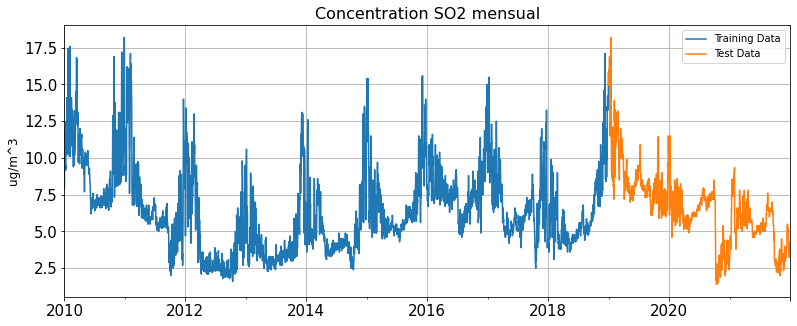

In [24]:
# Split
# Datos de entrenamiento
train_so2 = so2[(so2.index.year >= 2010) & (so2.index.year < 2019)]
fecha = pd.date_range(start='2010-01-01', end='2018-12-31', freq='D')   
train_so2['fecha'] = fecha
train_so2 = train_so2.set_index('fecha')
train_so2 = train_so2.asfreq('D')

# Datos de test
test_so2 = so2[(so2.index.year >= 2019) & (so2.index.year < 2022)]
fecha = pd.date_range(start='2019-01-01', end='2021-12-31', freq='D')   
test_so2['fecha'] = fecha
test_so2 = test_so2.set_index('fecha')
test_so2 = test_so2.asfreq('D')

# Grafico train-test
train_so2['SO2'].plot(figsize=(13,5),fontsize=15)
test_so2['SO2'].plot(figsize=(13,5),fontsize=15)
plt.title('Concentration SO2 mensual', fontsize=16)
plt.xlabel('')
plt.ylabel('ug/m^3', fontsize=12)
plt.grid()
plt.legend(['Training Data', 'Test Data'])
plt.show()

En primer lugar, vamos a estudiar las componentes de la serie:
1. Tendecia
2. Estacionalidad
3. Residuos

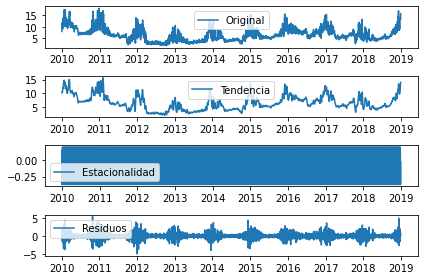

In [25]:
des = seasonal_decompose(train_so2)
tendencia = des.trend
estacionalidad = des.seasonal
res = des.resid

# plot the components
plt.subplot(411)
plt.plot(train_so2, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(tendencia, label='Tendencia')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(estacionalidad,label='Estacionalidad')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(res, label='Residuos')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Realizamos un test para ver si la serie es estacionaria

In [26]:
result = adfuller(train_so2['SO2'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -3.882876118650123
p-value: 0.0021645467661720015
Critical Values:
	1%: -3.4323587353357996
	5%: -2.8624275393930216
	10%: -2.5672424561649447


Como la serie es estacionaria, estudiamos las funciones de autocorrelación simple y parcial para ajustar un modelo SARIMA

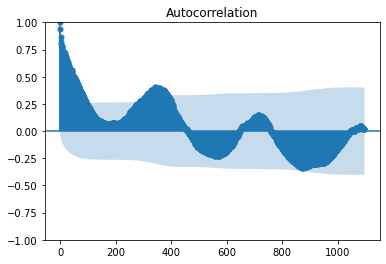

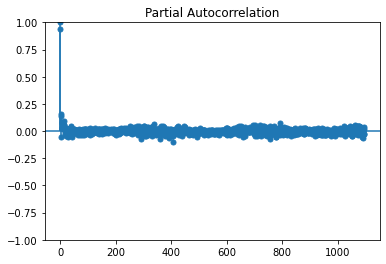

In [49]:
# FAS y FAP 
acf = plot_acf(train_so2, lags=365*3)
pacf = plot_pacf(train_so2, lags=365*3)

# Graficos
plt.show()

Proponemos entonces un modelo:

1. SARIMA(1,0,0)x(1,0,1)

In [ ]:
# Modelo
modelo1 = sm.tsa.statespace.SARIMAX(train_so2, order=(1,0,0), seasonal_order=(0,0,1,365))
results1 = modelo1.fit()

# Resultados
print(results1.summary())

**Predicciones**

### 3.1.2 Contaminante: $NO_2$

In [28]:
no2 = ts_magnitudes[['NO2']]
fecha = pd.date_range(start='2010-01-01', end='2021-12-31', freq='D')
no2['fecha'] = fecha
no2 = no2.set_index('fecha')
no2.head()

,NO2
fecha,
2010-01-01,20.521212
2010-01-02,39.996970
2010-01-03,50.518182
2010-01-04,52.221212
2010-01-05,46.469697


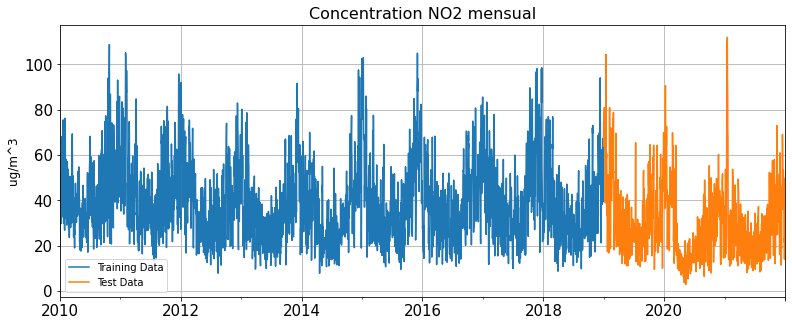

In [50]:
# Split
# Datos de entrenamiento
train_no2 = no2[(no2.index.year >= 2010) & (no2.index.year < 2019)]
fecha = pd.date_range(start='2010-01-01', end='2018-12-31', freq='D')   
train_no2['fecha'] = fecha
train_no2 = train_no2.set_index('fecha')
train_no2 = train_no2.asfreq('D')

# Datos de test
test_no2 = no2[(no2.index.year >= 2019) & (no2.index.year < 2022)]
fecha = pd.date_range(start='2019-01-01', end='2021-12-31', freq='D')   
test_no2['fecha'] = fecha
test_no2 = test_no2.set_index('fecha')
test_no2 = test_no2.asfreq('D')

# Grafico train-test
train_no2['NO2'].plot(figsize=(13,5),fontsize=15)
test_no2['NO2'].plot(figsize=(13,5),fontsize=15)
plt.title('Concentration NO2 mensual', fontsize=16)
plt.xlabel('')
plt.ylabel('ug/m^3', fontsize=12)
plt.grid()
plt.legend(['Training Data', 'Test Data'])
plt.show()

En primer lugar, vamos a estudiar las componentes de la serie:
1. Tendecia
2. Estacionalidad
3. Residuos

In [ ]:
des = seasonal_decompose(train_no2)
tendencia = des.trend
estacionalidad = des.seasonal
res = des.resid

# plot the components
plt.subplot(411)
plt.plot(train_so2, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(tendencia, label='Tendencia')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(estacionalidad,label='Estacionalidad')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(res, label='Residuos')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Realizamos un test para ver si la serie es estacionaria

In [30]:
result = adfuller(train_no2['NO2'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -5.09958735644035
p-value: 1.4045803753000518e-05
Critical Values:
	1%: -3.4323587353357996
	5%: -2.8624275393930216
	10%: -2.5672424561649447


Como la serie es estacionaria, estudiamos las funciones de autocorrelación simple y parcial para ajustar un ARIMA

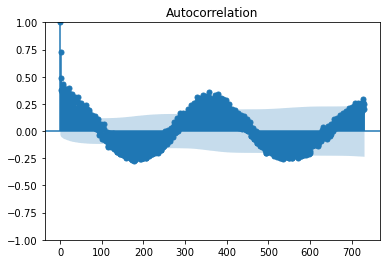

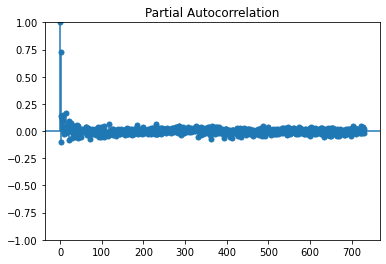

In [31]:
# FAS y FAP 
acf = plot_acf(train_no2, lags=365*2)
pacf = plot_pacf(train_no2, lags=365*2)

# Graficos
plt.show()

Ajustamos un modelo:

1. SARIMA(1,0,2)x(1,0,)

In [ ]:
# Modelo
modelo2 = sm.tsa.statespace.SARIMAX(train_no2, order=(1,0,2), seasonal_order=(1,0,0,365))
resultados2 = modelo2.fit()

# Resultados
print(resultados2.summary())

**Predicciones**

### 3.1.3 Contaminante: $PM2.5$

In [32]:
pm25 = ts_magnitudes[['PM2.5']]
fecha = pd.date_range(start='2010-01-01', end='2021-12-31', freq='D')
pm25['fecha'] = fecha
pm25 = pm25.set_index('fecha')
pm25.head()

,PM2.5
fecha,
2010-01-01,7.00
2010-01-02,10.00
2010-01-03,12.25
2010-01-04,9.00
2010-01-05,8.00


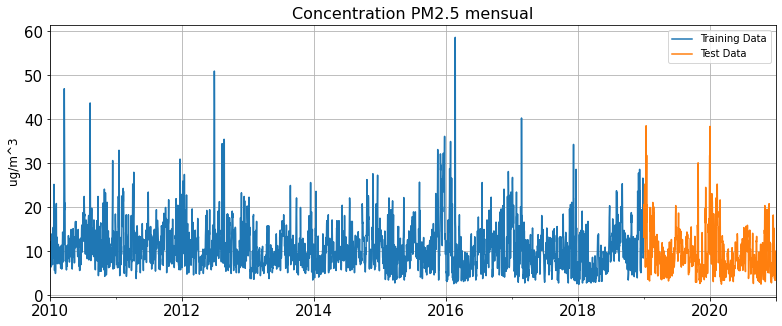

In [37]:
# Split
# Datos de entrenamiento
train_pm25 = pm25[(pm25.index.year >= 2010) & (pm25.index.year < 2019)]
fecha = pd.date_range(start='2010-01-01', end='2018-12-31', freq='D')   
train_pm25['fecha'] = fecha
train_pm25 = train_pm25.set_index('fecha')
train_pm25 = train_pm25.asfreq('D')

# Datos de test
test_pm25 = pm25[(pm25.index.year >= 2019) & (pm25.index.year < 2021)]
fecha = pd.date_range(start='2019-01-01', end='2020-12-31', freq='D')   
test_pm25['fecha'] = fecha
test_pm25= test_pm25.set_index('fecha')
test_pm35 = test_pm25.asfreq('D')

# Grafico train-test
train_pm25['PM2.5'].plot(figsize=(13,5),fontsize=15)
test_pm25['PM2.5'].plot(figsize=(13,5),fontsize=15)
plt.title('Concentration PM2.5 mensual', fontsize=16)
plt.xlabel('')
plt.ylabel('ug/m^3', fontsize=12)
plt.grid()
plt.legend(['Training Data', 'Test Data'])
plt.show()

En primer lugar, vamos a estudiar las componentes de la serie:
1. Tendecia
2. Estacionalidad
3. Residuos

In [ ]:
des = seasonal_decompose(train_pm25)
tendencia = des.trend
estacionalidad = des.seasonal
res = des.resid

# plot the components
plt.subplot(411)
plt.plot(train_so2, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(tendencia, label='Tendencia')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(estacionalidad,label='Estacionalidad')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(res, label='Residuos')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Realizamos un test para ver si la serie es estacionaria

In [38]:
result = adfuller(train_pm25['PM2.5'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -7.292522019799554
p-value: 1.4050941345267452e-10
Critical Values:
	1%: -3.432357502010421
	5%: -2.862426994644342
	10%: -2.567242166152283


Como la serie es estacionaria, estudiamos las funciones de autocorrelación simple y parcial para ajustar un ARIMA

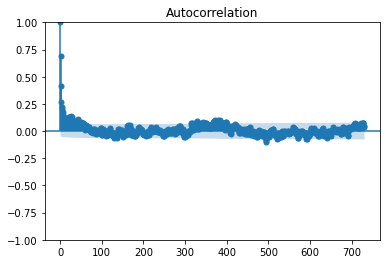

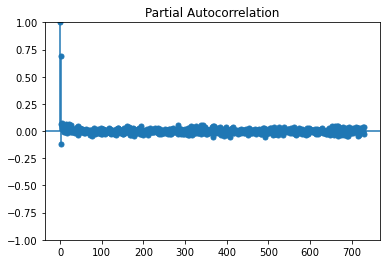

In [39]:
# FAS y FAP 
acf = plot_acf(train_pm25, lags=365*2)
pacf = plot_pacf(train_pm25, lags=365*2)

# Graficos
plt.show()

Ajustamos un modelo 

In [ ]:
# Modelo
modelo3 = sm.tsa.statespace.SARIMAX(train_pm25, order=(1,0,2), seasonal_order=(1,0,0,365))
resultados3 = modelo3.fit()

# Resultados
print(resultados3.summary())

**Predicciones**

### 3.1.4 Contaminante: $PM_{10}$

In [36]:
pm10 = ts_magnitudes[['PM10']]
fecha = pd.date_range(start='2010-01-01', end='2021-12-31', freq='D')
pm10['fecha'] = fecha
pm10 = pm10.set_index('fecha')
pm10.head()

,PM10
fecha,
2010-01-01,17.248571
2010-01-02,21.097143
2010-01-03,22.045714
2010-01-04,16.394286
2010-01-05,18.142857


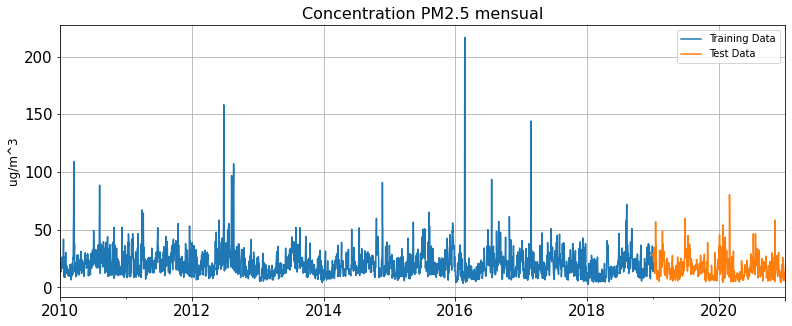

In [40]:
# Split
# Datos de entrenamiento
train_pm10 = pm10[(pm10.index.year >= 2010) & (pm10.index.year < 2019)]
fecha = pd.date_range(start='2010-01-01', end='2018-12-31', freq='D')   
train_pm10['fecha'] = fecha
train_pm10 = train_pm10.set_index('fecha')
train_pm10 = train_pm10.asfreq('D')

# Datos de test
test_pm10 = pm10[(pm10.index.year >= 2019) & (pm10.index.year < 2021)]
fecha = pd.date_range(start='2019-01-01', end='2020-12-31', freq='D')   
test_pm10['fecha'] = fecha
test_pm10 = test_pm10.set_index('fecha')
test_pm10 = test_pm10.asfreq('D')

# Grafico train-test
train_pm10['PM10'].plot(figsize=(13,5),fontsize=15)
test_pm10['PM10'].plot(figsize=(13,5),fontsize=15)
plt.title('Concentration PM10 mensual', fontsize=16)
plt.xlabel('')
plt.ylabel('ug/m^3', fontsize=12)
plt.grid()
plt.legend(['Training Data', 'Test Data'])
plt.show()

En primer lugar, vamos a estudiar las componentes de la serie:
1. Tendecia
2. Estacionalidad
3. Residuos

In [ ]:
des = seasonal_decompose(train_pm10)
tendencia = des.trend
estacionalidad = des.seasonal
res = des.resid

# plot the components
plt.subplot(411)
plt.plot(train_so2, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(tendencia, label='Tendencia')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(estacionalidad,label='Estacionalidad')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(res, label='Residuos')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Realizamos un test para ver si la serie es estacionaria

In [41]:
result = adfuller(train_pm10['PM10'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -6.701231662564464
p-value: 3.884662737424361e-09
Critical Values:
	1%: -3.432357502010421
	5%: -2.862426994644342
	10%: -2.567242166152283


Como la serie es estacionaria, estudiamos las funciones de autocorrelación simple y parcial para ajustar un ARIMA

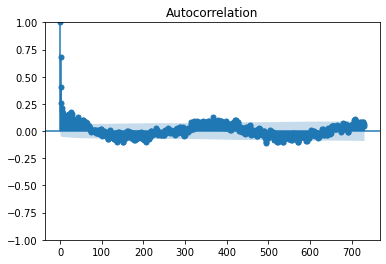

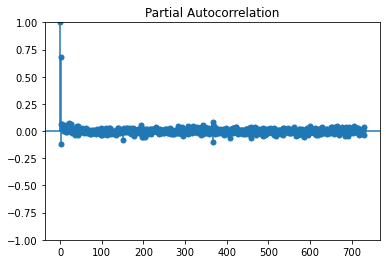

In [42]:
# FAS y FAP 
acf = plot_acf(train_pm10, lags=365*2)
pacf = plot_pacf(train_pm10, lags=365*2)

# Graficos
plt.show()

Así, ajustamos un modelo SARIMA:


In [ ]:
# Modelo
modelo4 = sm.tsa.statespace.SARIMAX(train_pm10, order=(1,0,2), seasonal_order=(1,0,0,365))
resultados4 = modelo4.fit()

# Resultados
print(resultados4.summary())

**Predicciones**

### 3.1.5 Contaminante: $O_3$

In [43]:
o3 = ts_magnitudes[['O3']]
fecha = pd.date_range(start='2010-01-01', end='2021-12-31', freq='D')
o3['fecha'] = fecha
o3 = o3.set_index('fecha')
o3.head()

,O3
fecha,
2010-01-01,53.929825
2010-01-02,25.645363
2010-01-03,12.789474
2010-01-04,13.505013
2010-01-05,21.863409


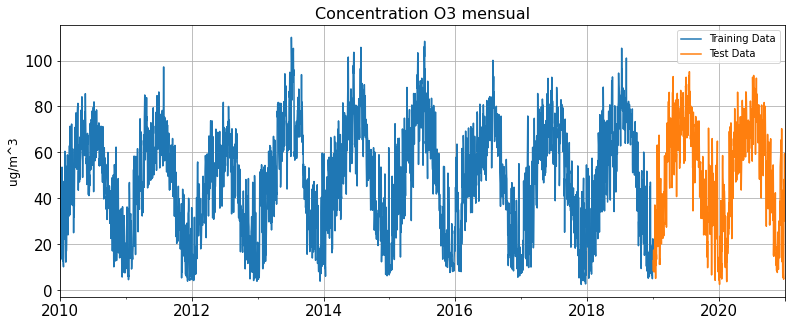

In [44]:
# Split
# Datos de entrenamiento
train_o3 = o3[(o3.index.year >= 2010) & (o3.index.year < 2019)]
fecha = pd.date_range(start='2010-01-01', end='2018-12-31', freq='D')   
train_o3['fecha'] = fecha
train_o3 = train_o3.set_index('fecha')
train_o3 = train_o3.asfreq('D')

# Datos de test
test_o3 = o3[(o3.index.year >= 2019) & (o3.index.year < 2021)]
fecha = pd.date_range(start='2019-01-01', end='2020-12-31', freq='D')   
test_o3['fecha'] = fecha
test_o3 = test_o3.set_index('fecha')
test_o3 = test_o3.asfreq('D')

# Grafico train-test
train_o3['O3'].plot(figsize=(13,5),fontsize=15)
test_o3['O3'].plot(figsize=(13,5),fontsize=15)
plt.title('Concentration O3 mensual', fontsize=16)
plt.xlabel('')
plt.ylabel('ug/m^3', fontsize=12)
plt.grid()
plt.legend(['Training Data', 'Test Data'])
plt.show()

En primer lugar, vamos a estudiar las componentes de la serie:
1. Tendecia
2. Estacionalidad
3. Residuos

In [ ]:
des = seasonal_decompose(train_o3)
tendencia = des.trend
estacionalidad = des.seasonal
res = des.resid

# plot the components
plt.subplot(411)
plt.plot(train_so2, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(tendencia, label='Tendencia')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(estacionalidad,label='Estacionalidad')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(res, label='Residuos')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Realizamos un test para ver si la serie es estacionaria

In [45]:
result = adfuller(train_o3['O3'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -3.3764630310519648
p-value: 0.01178789737579593
Critical Values:
	1%: -3.4323593525669414
	5%: -2.8624278120183573
	10%: -2.567242601304915


Como la serie es estacionaria, estudiamos las funciones de autocorrelación simple y parcial para ajustar un ARIMA

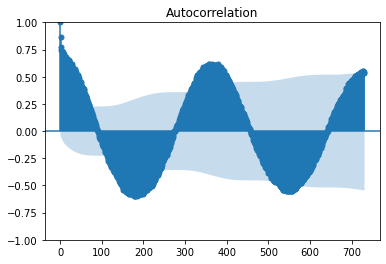

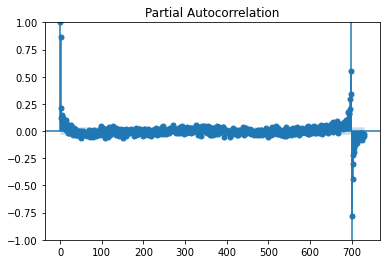

In [48]:
# FAS y FAP 
acf = plot_acf(train_o3, lags=365*2)
pacf = plot_pacf(train_o3, lags=365*2)

# Graficos
plt.show()

Así, ajustamos un modelo SARIMA:


In [ ]:
# Modelo
modelo5 = sm.tsa.statespace.SARIMAX(train_o3, order=(1,0,2), seasonal_order=(1,0,0,365))
resultados5 = modelo3.fit()

# Resultados
print(resultados5.summary())

**Predicciones**